<a id='Top'></a>

# Capstone Project (Feature Analysis - 1st Attempt)

The purpose of this capstone <u>is to study **a particular road feature or attributes** that affects the severity ranking.</u>

**Independent variable** - A manipulated variable that <u>will lead to change the dependent variable.<u>
 1.  'Amenity',
 2.  'Bump',
 3.  'Crossing',
 4.  'Give_Way',
 5.  'Junction',
 6.  'No_Exit',
 7.  'Railway',
 8.  'Roundabout',
 8.  'Station',
 10. 'Stop',
     
The items listed above will be our <u>factors or predictor variables (independent variables).</u>



**Dependent variable** - A varaible that its <u>value or result depends on the change of the independent variables.</u>

1.' Severity'

The above is <u>our target or outcome variable (dependent variables).</u>


### <u>Summary :</u>

[1. Importing Libaries](#section_1)

[2. Reading in the data](#section_2)

[3. Set features to connect to target variable](#section_3)

[4. Univariate Analysis](#section_4)

[5. Checking Covariance](#section_5)

[6. Checking Multicollinearity](#section_6)

[7. Detecting Multicollinearity with the Variance Inflation Factors ](#section_7)

[8. Build a Linear Regression With Statsmodel](#section_8)

[9. Probability Plot (Q-Q) and Homoscedascity of Residuals](#section_9)

[10. Conclusion](#section_10)

<a id='section_1'></a>

#### 1. Importing Libaries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np

# Importing plotting / Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# tqdm progress bar 
from tqdm import tqdm

<a id='section_2'></a>

#### 2. Reading in the data

In [2]:
# Reading in the cleaned csv. The 'skipintialspace' remove all the whitespaces during reading the csv.
df = pd.read_csv('data/US_Accidents_Cleaned.csv', index_col=0, skipinitialspace=True)
                 
# Note: During the conversion of the independent variable to binary it is returning "Nan".
# Which is causing by any white space during entering the data.
# Could use "df[col].str.strip()" for each column; however I choose it to be done during the csv read.

In [3]:
# Check the Data Frame info and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7717272 entries, A-1 to A-7777761
Data columns (total 19 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Severity    int64  
 1   Start_Time  object 
 2   End_Time    object 
 3   Latitude    float64
 4   Longitude   float64
 5   Street      object 
 6   City        object 
 7   County      object 
 8   State       object 
 9   Amenity     bool   
 10  Bump        bool   
 11  Crossing    bool   
 12  Give_Way    bool   
 13  Junction    bool   
 14  No_Exit     bool   
 15  Railway     bool   
 16  Roundabout  bool   
 17  Station     bool   
 18  Stop        bool   
dtypes: bool(10), float64(2), int64(1), object(6)
memory usage: 662.4+ MB


In [4]:
# Check dataframe
df.head(3)

,Severity,Start_Time,End_Time,Latitude,Longitude,Street,City,County,State,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop
ID,,,,,,,,,,,,,,,,,,,
A-1,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,I-70 E,Dayton,Montgomery,OH,False,False,False,False,False,False,False,False,False,False
A-2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,Brice Rd,Reynoldsburg,Franklin,OH,False,False,False,False,False,False,False,False,False,False
A-3,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,State Route 32,Williamsburg,Clermont,OH,False,False,False,False,False,False,False,False,False,False


In [5]:
# Check the data frame info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7717272 entries, A-1 to A-7777761
Data columns (total 19 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Severity    int64  
 1   Start_Time  object 
 2   End_Time    object 
 3   Latitude    float64
 4   Longitude   float64
 5   Street      object 
 6   City        object 
 7   County      object 
 8   State       object 
 9   Amenity     bool   
 10  Bump        bool   
 11  Crossing    bool   
 12  Give_Way    bool   
 13  Junction    bool   
 14  No_Exit     bool   
 15  Railway     bool   
 16  Roundabout  bool   
 17  Station     bool   
 18  Stop        bool   
dtypes: bool(10), float64(2), int64(1), object(6)
memory usage: 662.4+ MB


The independent variable are in bool datatype (True/False).

<a id='section_3'></a>

#### 3. Set features to connect to target variable

Noticed that **there is no relationship** <u>of how Severity can be connected to the independent features.</u>

**The independent features is just True or False** <u>but does not indicate how Severity (1, 2, 3, 4) maybe linked to it.</u>

Thus will **create another feature/column** <u>concat with the road features and Severity and will **copy the Severity rating to that row of the newly created features.**</u>

In [6]:
# Select the bool type independent variable
bool_columns = df.select_dtypes('bool')

# Assign to col variable
cols = bool_columns.columns

# See the independent bool columns
cols

Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop'],
      dtype='object')

In [7]:
# Suffix letter
suffix_letter = 'Severity'

# Create an empty dictionary
col_dict = {}

# Create a loop to concatenate the suffix to the columns
for col in cols:
    n_col = '{}_{}'.format(col, suffix_letter)
    col_dict[col]=n_col

# Check the output
col_dict

{'Amenity': 'Amenity_Severity',
 'Bump': 'Bump_Severity',
 'Crossing': 'Crossing_Severity',
 'Give_Way': 'Give_Way_Severity',
 'Junction': 'Junction_Severity',
 'No_Exit': 'No_Exit_Severity',
 'Railway': 'Railway_Severity',
 'Roundabout': 'Roundabout_Severity',
 'Station': 'Station_Severity',
 'Stop': 'Stop_Severity'}

Now the new features names are created as values of the col_dict dictionary.

Looping the dictionary and finding the Severity rating at that particular row.

And put it in the same new of the new feature column.

In [8]:
# Iterate to create a new column grabbing the Severity value on each road presence
for key, value in col_dict.items():
    
    # Create a new column of road feature with the data of severity rank
    df[value] = df.loc[df[key]==True, 'Severity']

    # Replace all the Nan with zero
    df[value].fillna(0, inplace=True)

    # Down cast the data type from int64 to int16
    df[value] = df[value].astype('int16')

In [9]:
# Below same as above with subsetting
df.query('Bump_Severity == 4')[['Bump_Severity', 'Bump', 'Severity']].head(5)

,Bump_Severity,Bump,Severity
ID,,,
A-1529651,4,True,4
A-3552379,4,True,4
A-3614703,4,True,4
A-3647227,4,True,4
A-3882695,4,True,4


The Bump_Severity value now matches the Bump, as True, and the correct value.

In [10]:
# Sanity check if the Severity is set on the new features
df.loc[df['Amenity_Severity'] == 1, ['Severity', 'Amenity', 'Amenity_Severity']].head(5)

,Severity,Amenity,Amenity_Severity
ID,,,
A-8644,1,True,1
A-24311,1,True,1
A-25280,1,True,1
A-56998,1,True,1
A-81467,1,True,1


The Amenity_Severity value now matches the Bump, as True, and the correct value.

In [11]:
# Check the Data Frame and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7717272 entries, A-1 to A-7777761
Data columns (total 29 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Severity             int64  
 1   Start_Time           object 
 2   End_Time             object 
 3   Latitude             float64
 4   Longitude            float64
 5   Street               object 
 6   City                 object 
 7   County               object 
 8   State                object 
 9   Amenity              bool   
 10  Bump                 bool   
 11  Crossing             bool   
 12  Give_Way             bool   
 13  Junction             bool   
 14  No_Exit              bool   
 15  Railway              bool   
 16  Roundabout           bool   
 17  Station              bool   
 18  Stop                 bool   
 19  Amenity_Severity     int16  
 20  Bump_Severity        int16  
 21  Crossing_Severity    int16  
 22  Give_Way_Severity    int16  
 23  Junction_Severity    int16  
 24 

The features that has a bool is no longer needed and will be drop.

Below is the code for dropping those columns.

In [12]:
# Drop all the bool
df = df.drop(columns=cols, axis=1).copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7717272 entries, A-1 to A-7777761
Data columns (total 19 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Severity             int64  
 1   Start_Time           object 
 2   End_Time             object 
 3   Latitude             float64
 4   Longitude            float64
 5   Street               object 
 6   City                 object 
 7   County               object 
 8   State                object 
 9   Amenity_Severity     int16  
 10  Bump_Severity        int16  
 11  Crossing_Severity    int16  
 12  Give_Way_Severity    int16  
 13  Junction_Severity    int16  
 14  No_Exit_Severity     int16  
 15  Railway_Severity     int16  
 16  Roundabout_Severity  int16  
 17  Station_Severity     int16  
 18  Stop_Severity        int16  
dtypes: float64(2), int16(10), int64(1), object(6)
memory usage: 736.0+ MB


In [13]:
# Check the columns after dropping
list(df.columns)

['Severity',
 'Start_Time',
 'End_Time',
 'Latitude',
 'Longitude',
 'Street',
 'City',
 'County',
 'State',
 'Amenity_Severity',
 'Bump_Severity',
 'Crossing_Severity',
 'Give_Way_Severity',
 'Junction_Severity',
 'No_Exit_Severity',
 'Railway_Severity',
 'Roundabout_Severity',
 'Station_Severity',
 'Stop_Severity']

Now the new features are set and next will be each feature analysis.

<a id='section_4'></a>

#### 4. Univariate Analysis

At: 100%|████████████████████████████████████| 10/10 [00:25<00:00,  2.55s/ticks]


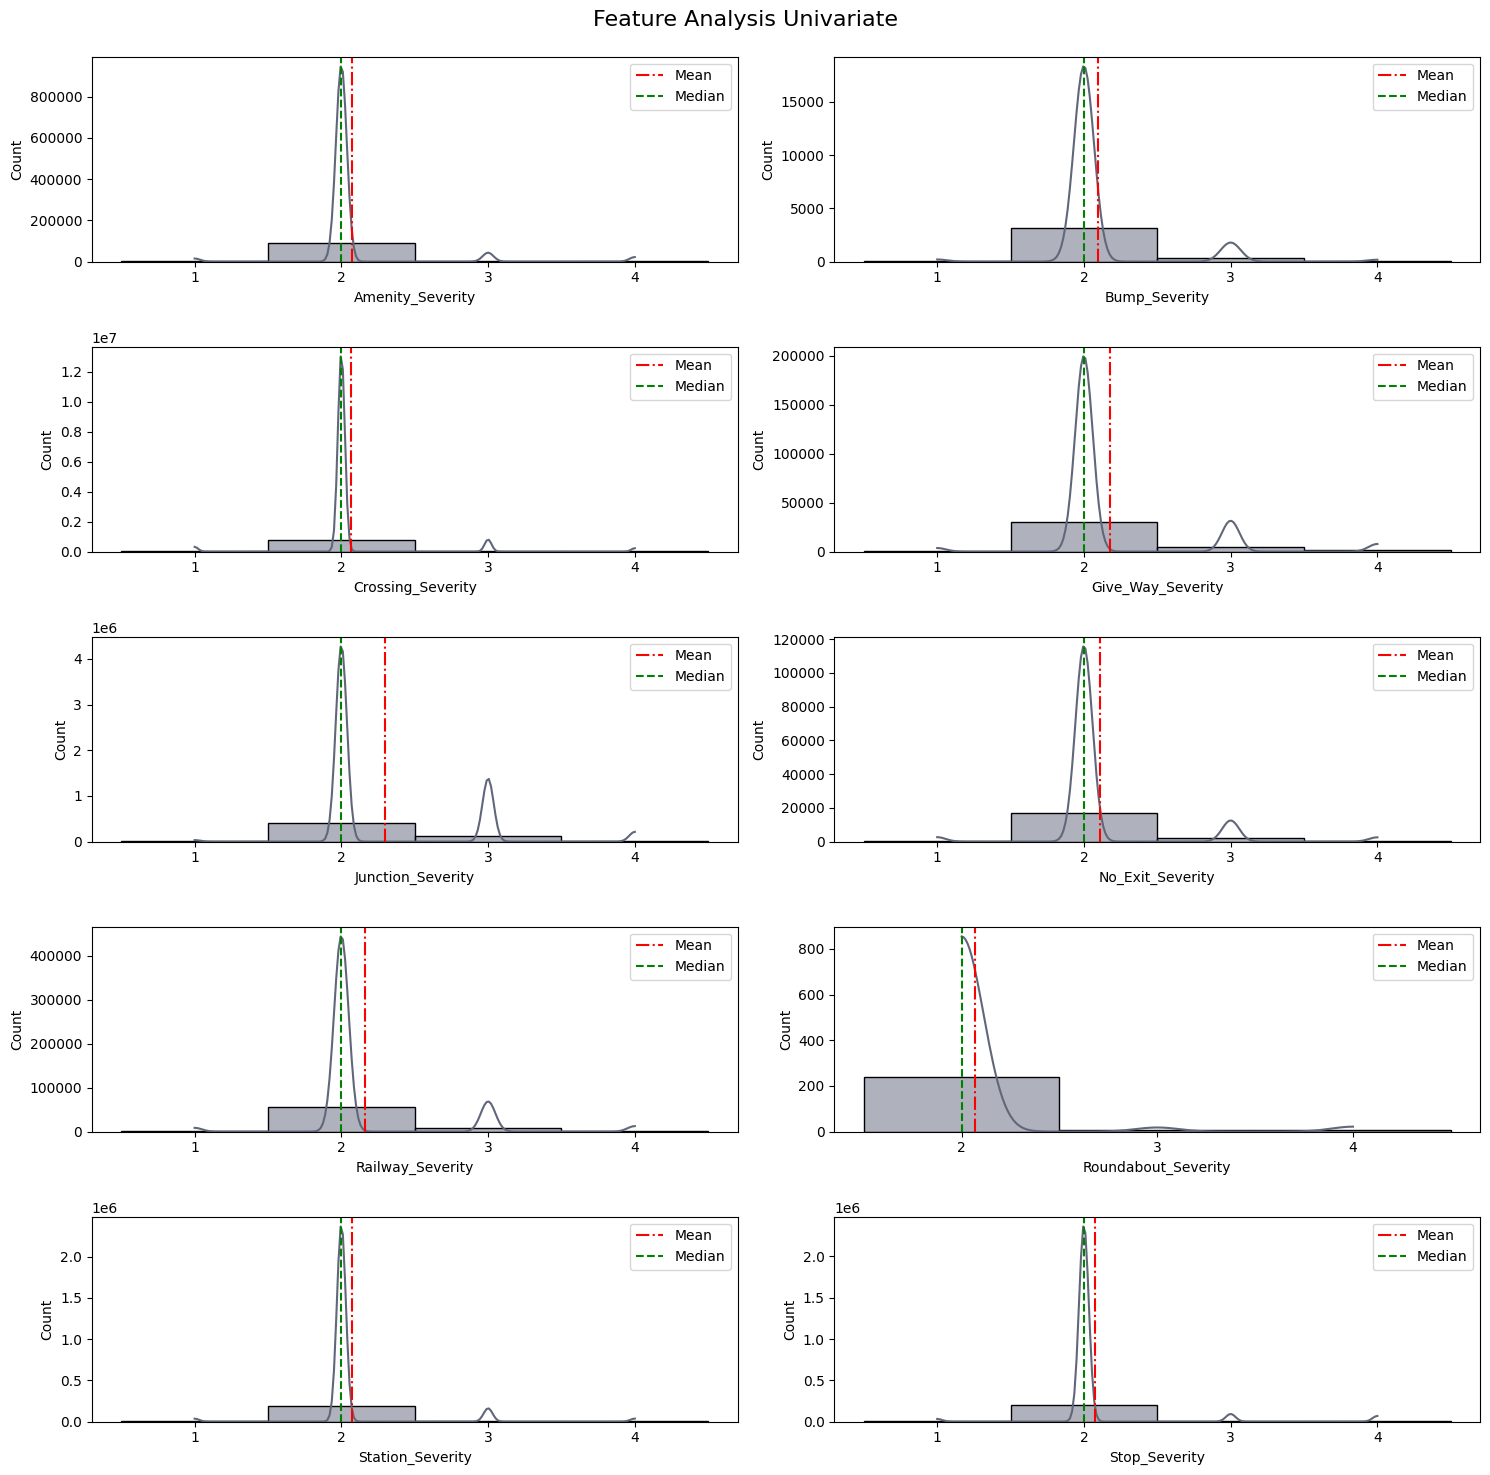

In [14]:
# Visualize distribution of unscaled data in each feature

# List of columns and comment out not needed in the visuals
col_names = [
# 'Severity', 
# 'Start_Time', 
# 'End_Time', 
# 'Latitude', 
# 'Longitude', 
# 'Street',
# 'City', 
# 'County', 
# 'State', 
'Amenity_Severity', 
'Bump_Severity',
'Crossing_Severity', 
'Give_Way_Severity', 
'Junction_Severity',
'No_Exit_Severity', 
'Railway_Severity', 
'Roundabout_Severity',
'Station_Severity', 
'Stop_Severity' 
]

# Import tqdm
from tqdm import tqdm

# Initialize the subplot numbering
plot_num = 1

# Set the subplots to 5 rows and 2 columns
fig, ax = plt.subplots(5,2, figsize=(15, 15))

# fig.subplots_adjust(top=0.9, wspace=0.3, hspace=1)
fig.subplots_adjust(top=0.9, wspace=0.3, hspace=10)

# Set the super title for the univariate plots
fig.suptitle(f'Feature Analysis Univariate', fontsize=16)

# Iterate all independent variables and plot it
for col in tqdm(col_names,\
                #tdqm arguments
                # colour='#61677A',\
                # colour='#74c69d',\
                ncols=80,\
                position=0,\
                unit='ticks',\
                smoothing=1,\
                desc='At',\
                delay=0.01):
                    
    # Filter out the zero count column in iteration
    no_zero = df[(df[col]!=0)]

    # Put the series into a variable
    var = no_zero[col]

    # Compute the mean and median
    var_mean = var.mean()
    var_median = var.median()
    
    # Plot for each column feature
    plt.subplot(5, 2, plot_num)
    plt.xscale('linear')
    plt.xticks([1, 2, 3, 4])
    sns.histplot(no_zero, 
                 x=col, 
                 color="#61677A" , 
                 kde=True, stat="count", 
                 discrete=True, 
                 binwidth=1, 
                 element='bars',
                 cumulative=False, 
                 common_norm=False, 
                 multiple='stack' 
                )
    # Set the average horizontal line 
    plt.axvline(var_mean, c='red', linestyle='-.', label='Mean')

    # Set the median horizontal line
    plt.axvline(var_median, c='green', linestyle='--', label='Median')
   
    # Add 1 to move to next subplot
    plot_num +=1
    plt.legend()

# Plot the visual
plt.tight_layout()
plt.show()

In [15]:
# See the value counts of a feature
df['Station_Severity'].value_counts()

Station_Severity
0    7515463
2     183950
3      12387
4       2766
1       2706
Name: count, dtype: int64

The **independent features severity** <u>are centered **to number 2 and a few rated 3**.</u>

Another interesting that at **Feature_Severity** <u>has a hump at 3 that could suggest it's own normal distribution.</u>

However, the **highest count** <u>are those on the Crossing, Junction, Station and Stop.</u>

<a id='section_5'></a>

#### 5. Checking Covariance

In probability theory and statistics, **covariance is a measure of the joint variability of two random variables.**

[1] **If the greater values of one variable mainly correspond with the greater values of the other variable,** and the same holds for the lesser values (that is, the variables tend to show similar behavior), the covariance is positive.

[2] **In the opposite case, when the greater values of one variable mainly correspond to the lesser values of the other,** (that is, the variables tend to show opposite behavior), the covariance is negative. The sign of the covariance, therefore, shows the tendency in the linear relationship between the variables.

In [16]:
# Covariance of Numeric Features
cov_df = df.cov(numeric_only=True)
cov_df.style.background_gradient(cmap='cubehelix')

,Severity,Latitude,Longitude,Amenity_Severity,Bump_Severity,Crossing_Severity,Give_Way_Severity,Junction_Severity,No_Exit_Severity,Railway_Severity,Roundabout_Severity,Station_Severity,Stop_Severity
Severity,0.237663,0.170953,0.447658,-0.001992,-0.000057,-0.019408,0.000793,0.036227,-0.000092,0.000830,-0.000006,-0.004199,-0.003732
Latitude,0.170953,25.775780,-6.000511,0.027128,-0.000219,-0.213103,0.002257,0.141608,-0.002051,0.004456,-0.000058,-0.077559,-0.000267
Longitude,0.447658,-6.000511,302.464990,0.036784,-0.009815,0.663202,0.066979,-0.282995,0.014429,-0.061214,-0.000030,0.023984,-0.173092
Amenity_Severity,-0.001992,0.027128,0.036784,0.054465,0.000059,0.022907,0.000205,-0.003589,0.000351,0.002324,0.000000,0.011767,0.002702
Bump_Severity,-0.000057,-0.000219,-0.009815,0.000059,0.002051,0.000382,0.000001,-0.000109,0.000120,0.000011,-0.000000,0.000069,0.000274
Crossing_Severity,-0.019408,-0.213103,0.663202,0.022907,0.000382,0.442825,0.006218,-0.033558,0.004252,0.023451,0.000004,0.037648,0.025828
Give_Way_Severity,0.000793,0.002257,0.066979,0.000205,0.000001,0.006218,0.023505,-0.000771,0.000125,0.000098,0.000003,-0.000134,0.001702
Junction_Severity,0.036227,0.141608,-0.282995,-0.003589,-0.000109,-0.033558,-0.000771,0.382337,-0.000165,-0.000635,0.000077,-0.007393,-0.007336
No_Exit_Severity,-0.000092,-0.002051,0.014429,0.000351,0.000120,0.004252,0.000125,-0.000165,0.011703,0.000083,-0.000000,0.000596,0.000923
Railway_Severity,0.000830,0.004456,-0.061214,0.002324,0.000011,0.023451,0.000098,-0.000635,0.000083,0.041908,-0.000001,0.010014,0.000464


Above heat map show no much covariance. The highlighted as white covariance to the Latitude and Longitude to some road features. 

The rest to itself which explain naturally.

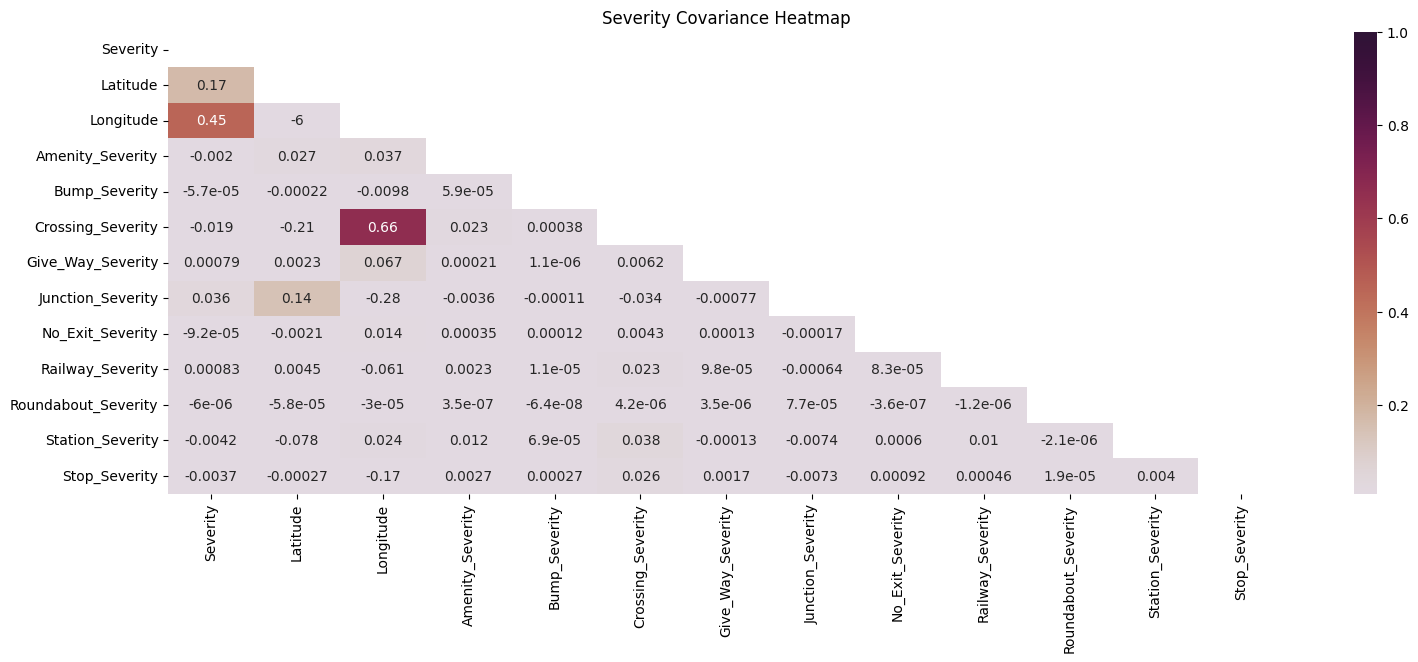

In [17]:
# Set the figure size of the plot
plt.figure(figsize=(18, 6))

# Mask use to filter out the redundant info
mask = np.triu(np.ones_like(cov_df, dtype=bool))

# Heat map of the Covariance removed redundant info
sns.heatmap(cov_df, mask=mask, annot=True,vmax=1, vmin=0.01, center=0, cmap="twilight_shifted") #

# Set the title
plt.title('Severity Covariance Heatmap')
plt.show()

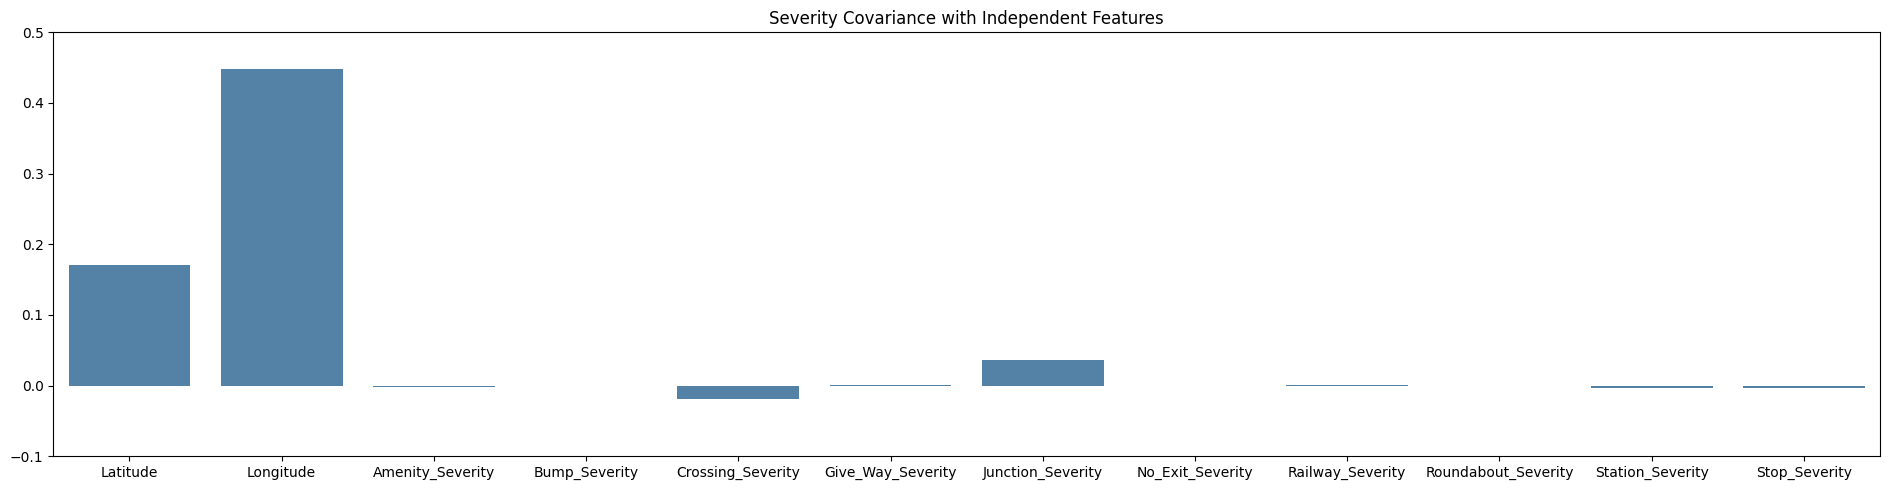

In [18]:
# Set the figure size of the plot
plt.figure(figsize=(19, 5))

# Assign to variable the DataFrame Covariance index and values
x = cov_df.index
y = cov_df.values

# Slice the column and row of the cov_df index and values (Remove Severity)
x = x[1:]
y = y[0, 1:]

# sns.barplot(x=x, y=y, color='darkorchid')#like
sns.barplot(x=x, y=y, color='steelblue')
plt.ylim(-0.1, 0.5)

# Set the title for the Severity Covariance barplot
plt.title('Severity Covariance with Independent Features')
plt.tight_layout()

On the data and graph above <u>there is **no much join variability of road features** independent variables.</u>
The **covariance almost neglible.**

<a id='section_6'></a>

#### 6. Checking Multicollinearity

**Correlation or dependence** <u>is any statistical relationship, whether causal or not, between two random variables or bivariate data.</u>
It usually refers to the degree to which a pair of variables are linearly related. 

**Correlations** <u>are useful because they can indicate a predictive relationship that can be exploited.</u>

**Multicollinearity (also collinearity)** is a phenomenon in <u>which one predictor variable in a multiple regression model can be linearly predicted from the others with a substantial degree of accuracy.</u> 

In this situation, the <u>coefficient estimates of the multiple regression may change erratically in response to small changes in the model or the data.</u> 

**Multicollinearity** <u>does not reduce the **predictive power or reliability of the model** as a whole,</u>at least within this data set; <u>it only affects calculations regarding individual predictors.</u>



In [19]:
# Correlation between each independent variable (Numerical)
corr_df = df.corr(numeric_only=True)

# Set the stying background gradient 
corr_df.style.background_gradient(cmap='pink') #Like

,Severity,Latitude,Longitude,Amenity_Severity,Bump_Severity,Crossing_Severity,Give_Way_Severity,Junction_Severity,No_Exit_Severity,Railway_Severity,Roundabout_Severity,Station_Severity,Stop_Severity
Severity,1.000000,0.069070,0.052799,-0.017507,-0.002576,-0.059825,0.010608,0.120177,-0.001736,0.008313,-0.001037,-0.025629,-0.022063
Latitude,0.069070,1.000000,-0.067959,0.022895,-0.000954,-0.063077,0.002899,0.045109,-0.003735,0.004288,-0.000960,-0.045459,-0.000152
Longitude,0.052799,-0.067959,1.000000,0.009063,-0.012462,0.057305,0.025120,-0.026316,0.007669,-0.017194,-0.000146,0.004104,-0.028684
Amenity_Severity,-0.017507,0.022895,0.009063,1.000000,0.005604,0.147503,0.005737,-0.024868,0.013921,0.048636,0.000126,0.150035,0.033370
Bump_Severity,-0.002576,-0.000954,-0.012462,0.005604,1.000000,0.012670,0.000152,-0.003892,0.024562,0.001220,-0.000118,0.004502,0.017459
Crossing_Severity,-0.059825,-0.063077,0.057305,0.147503,0.012670,1.000000,0.060945,-0.081556,0.059063,0.172147,0.000535,0.168354,0.111859
Give_Way_Severity,0.010608,0.002899,0.025120,0.005737,0.000152,0.060945,1.000000,-0.008128,0.007560,0.003128,0.001895,-0.002597,0.031996
Junction_Severity,0.120177,0.045109,-0.026316,-0.024868,-0.003892,-0.081556,-0.008128,1.000000,-0.002470,-0.005020,0.010491,-0.035578,-0.034194
No_Exit_Severity,-0.001736,-0.003735,0.007669,0.013921,0.024562,0.059063,0.007560,-0.002470,1.000000,0.003761,-0.000277,0.016396,0.024598
Railway_Severity,0.008313,0.004288,-0.017194,0.048636,0.001220,0.172147,0.003128,-0.005020,0.003761,1.000000,-0.000513,0.145558,0.006536


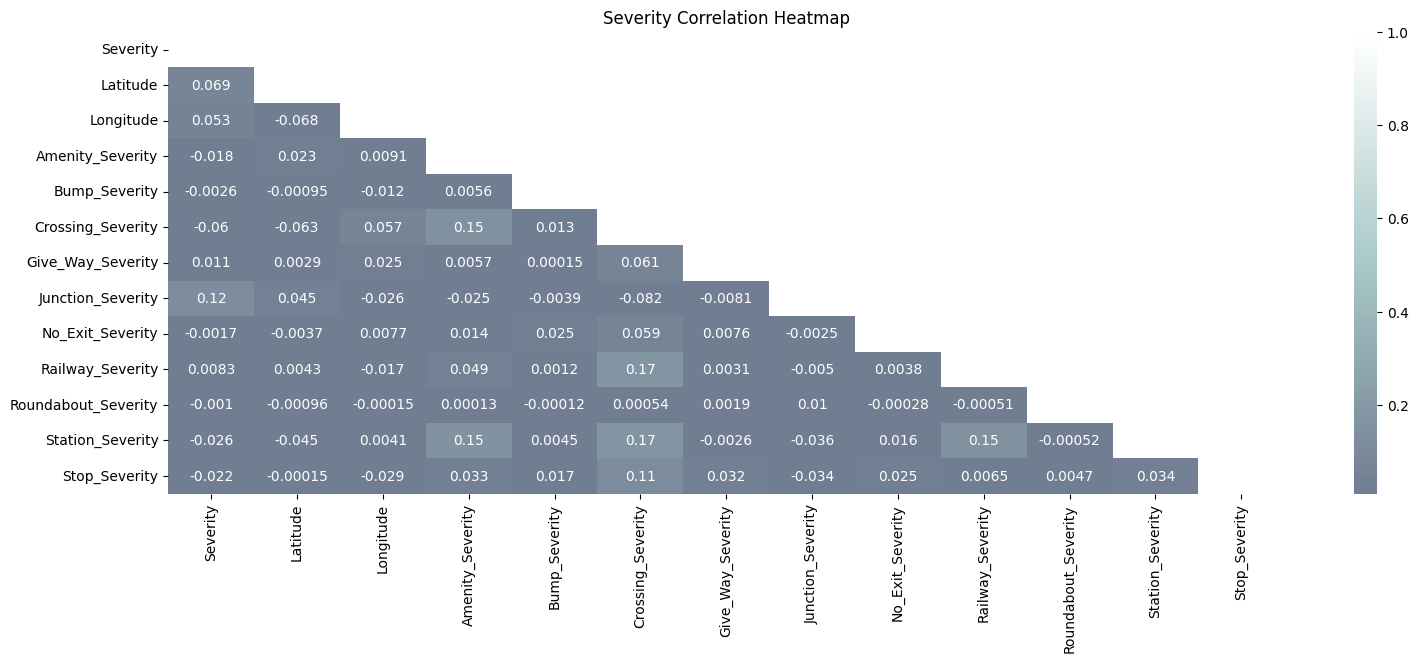

In [20]:
# Set the figure size of the heat plot
plt.figure(figsize=(18, 6))

# Mask use to filter out the redundant info.
mask = np.triu(np.ones_like(corr_df, dtype=bool))

# Visual the data using a heatmap
sns.heatmap(corr_df, mask=mask, annot=True,vmax=1, vmin=0.01, center=0, cmap="bone")


# Set the title for Severity Heatmap
plt.title('Severity Correlation Heatmap')
plt.show()

There seem **no strong multicolinearity** <u>in independent features.</u>

But noticed that some have same rating.

1. **Railway_Severity & Station_Severity** - 0.15
2. **Crossing_Severity & Station_Severity & Railway_Severity** - 0.17
3. **Amenity_Severity & Crossing_Severity** - 0.15

First two relates possibly about a train station nearby.

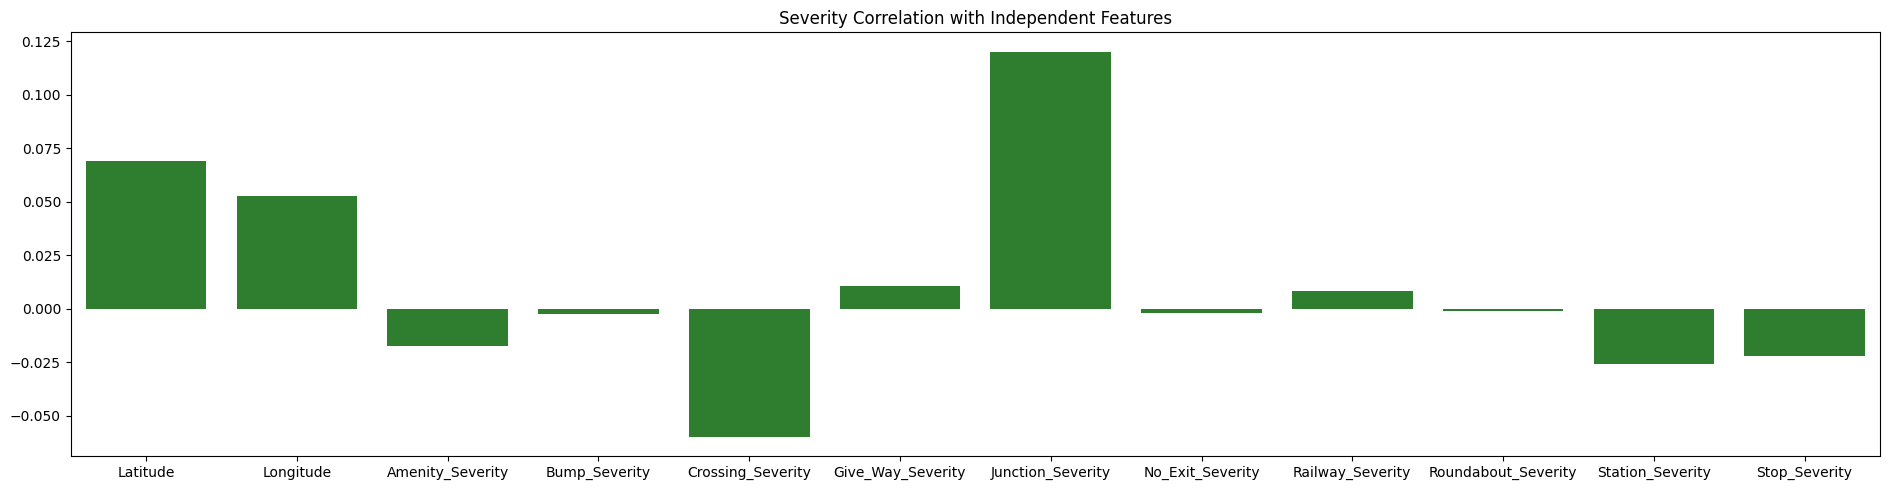

In [21]:
# Set the correlation visual size
plt.figure(figsize=(19, 5))

# Assign to a variable the index and values
x = corr_df.index
y = corr_df.values

# Slice the column and row of the cov_df index and values (Remove Severity)
x = x[1:]
y = y[0, 1:]

# Show the correlation visual
sns.barplot(x=x, y=y, color='forestgreen')
plt.title('Severity Correlation with Independent Features')
plt.tight_layout()

Negative correlation is a relationship between two variables in which one variable increases as the other decreases, and vice versa (Positive correlation).

- **Positive correlation are:**

  Give_Way_Severity, Junction_Severity, Railway_Severity, Latitude, Longtitude

- **Negative correlation are:**

  Amenity_Severity, Bump_Severity, Crossing_Severity, No_Exit_Severity, Roundabout_Severity, Station_Severity, Stop_Severity
  ty'

<a id='section_7'></a>

#### 7. Detecting Multicollinearity with the Variance Inflation Factors

In statistics, the **variance inflation factor (VIF)** is the ratio (quotient) of the variance of estimating some parameter in a model that includes multiple other terms (parameters) by the variance of a model constructed using only one term.

[1] It quantifies the severity of multicollinearity in an ordinary least squares regression analysis. It provides an index that measures how much the variance (the square of the estimate's standard deviation) of an estimated regression coefficient is increased because of collinearity.

**Looking at correlations only <u>won't detect multicollinearity**,</u> hence we need a new tool: the **Variance Inflation Factor (VIF).** 

In order to calculate it, we build a regression model of each independent variable against the other independent variables and look at the $R^2$ score. 
The VIF for each predictor is defined as 
$$
\text{VIF}_i = \frac{1}{1-R_i^2}
$$

In a perfect scenario of no multicollinearity, the VIF for each predictor should be 1 (since the $R^2$ from each model would be 0, showing that the given independent variable can't be modeled by the other variables, hence no linear relationship). 

By common convention, **any VIF value higher than 5 indicates high multicollinearity.** Let's examine the VIF for the variables in our data:

In [22]:
# Check the columns in the DataFrame
list(df.columns)

['Severity',
 'Start_Time',
 'End_Time',
 'Latitude',
 'Longitude',
 'Street',
 'City',
 'County',
 'State',
 'Amenity_Severity',
 'Bump_Severity',
 'Crossing_Severity',
 'Give_Way_Severity',
 'Junction_Severity',
 'No_Exit_Severity',
 'Railway_Severity',
 'Roundabout_Severity',
 'Station_Severity',
 'Stop_Severity']

In [23]:
# Assign in a temporary Data Frame of filtered features for VIF
temp_df = df.drop(columns=['Start_Time', 'End_Time', 'Latitude', 'Longitude', 'Street',
       'City', 'County', 'State',])

In [24]:
'''Calculate Variance Inflation Factor for each feature'''

# Import the necessary libraries to compute Variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to hold the VIF scores
vif_scores = pd.DataFrame()

# Create a feature columnabs
vif_scores["Features"] = temp_df.columns 
  
# Calculating VIF for each feature 
vif_scores["VIF Scores"] = [variance_inflation_factor(temp_df.values, i)\
                            for i in tqdm(range(len(temp_df.columns)),
                                          # tqdm arguments
                                          desc='At', \
                                          unit='ticks',\
                                          ncols=80 )] 
  
# display(vif_scores)
vif_scores.style.background_gradient(cmap='bone')

At: 100%|████████████████████████████████████| 11/11 [01:32<00:00,  8.41s/ticks]


,Features,VIF Scores
0,Severity,1.243907
1,Amenity_Severity,1.052348
2,Bump_Severity,1.001426
3,Crossing_Severity,1.216149
4,Give_Way_Severity,1.009367
5,Junction_Severity,1.096052
6,No_Exit_Severity,1.006963
7,Railway_Severity,1.055067
8,Roundabout_Severity,1.000170
9,Station_Severity,1.088753


A rule of thumb for interpreting the variance inflation factor:
- Rating of **1 is not correlated.**
- Between **1 and 5 is moderately correlated.**
- Greater than **5 is highly correlated.**

As the results tells that **all features** <u>is slighltly or moderately correlated.</u>



<a id='section_8'></a>

#### 8. Build a Linear Regression With Statsmodel

In [25]:
# Note: stats already imported at VIF (import statsmodels.api as sm)

# Separate the dependent (y) and independent variables (X)
X = temp_df.drop(columns=['Severity'])
# X = X.reindex(axis='columns')

# Set the dependent or target variable
y = temp_df['Severity']
# y = np.array(y).reshape(-1, 1)

# Add the constants
X_withconstant = sm.add_constant(X)

In [26]:
# Check the dependent or target variable
y.shape

(7717272,)

In [27]:
# Check the independent variable
X.shape

(7717272, 10)

In [28]:
# Sanity check of constants
X_withconstant.head(10)

,const,Amenity_Severity,Bump_Severity,Crossing_Severity,Give_Way_Severity,Junction_Severity,No_Exit_Severity,Railway_Severity,Roundabout_Severity,Station_Severity,Stop_Severity
ID,,,,,,,,,,,
A-1,1.0,0,0,0,0,0,0,0,0,0,0
A-2,1.0,0,0,0,0,0,0,0,0,0,0
A-3,1.0,0,0,0,0,0,0,0,0,0,0
A-4,1.0,0,0,0,0,0,0,0,0,0,0
A-5,1.0,0,0,0,0,0,0,0,0,0,0
A-6,1.0,0,0,0,0,0,0,0,0,0,0
A-7,1.0,0,0,0,0,0,0,0,0,0,0
A-8,1.0,0,0,0,0,0,0,0,0,0,0
A-9,1.0,0,0,0,0,0,0,0,0,0,0


The **X_withconstant** <u>is good and the dependent variable "Severity" is removed.</u>

In [29]:
# Instantiate the model 
model_linear = sm.OLS(y, X_withconstant)

# Fit the model (Returns a separate object with the parameters)
model_linear_results = model_linear.fit()

# Print out the summary and title of the results
model_linear_results.summary(title='Ordinary Least Square Result Severity')

# '''
# Note:
# Since the dependent variable(y) ranges from 1-4 the "sm.logit" requires
# that the y is either 1 or 0 (As required in Logistic Regression.)
# '''

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Ordinary Least Square Result Severity                     
==============================================================================
Dep. Variable:               Severity   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                 1.409e+04
Date:                Sat, 19 Aug 2023   Prob (F-statistic):               0.00
Time:                        17:55:43   Log-Likelihood:            -5.3361e+06
No. Observations:             7717272   AIC:                         1.067e+07
Df Residuals:                 7717261   BIC:                         1.067e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.2067      0.000   1.13e+04      0.000       2.206       2.207
Amenity_Severity       -0.0119      0.001    -15.665      0.000      -0.013      -0.010
Bump_Severity          -0.0135      0.004     -3.507      0.000      -0.021      -0.006
Crossing_Severity      -0.0368      0.000   -134.428      0.000      -0.037      -0.036
Give_Way_Severity       0.0474      0.001     41.732      0.000       0.045       0.050
Junction_Severity       0.0909      0.000    321.731      0.000       0.090       0.091
No_Exit_Severity        0.0089      0.002      5.537      0.000       0.006       0.012
Railway_Severity        0.0476      0.001     54.737      0.000       0.046       0.049
Roundabout_Severity    -0.0895      0.015     -6.125      0.000      -0.118      -0.061
Station_Severity       -0.0213      0.001    -39.978      0.000      -0.022      -0.020
Stop_Severity          -0.0175      0.001    -34.612      0.000      -0.018      -0.016
==============================================================================
Omnibus:                  2623656.319   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7876549.707
Skew:                           1.802   Prob(JB):                         0.00
Kurtosis:                       6.391   Cond. No.                         89.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Based on the p-values** associated with every variable, we can see that <u>all features seem **significant in predicting the Severity rating**</u> (p-values are > 0.05 are considered insignificant).

**$R^2$ is 0.018** has a <u>very small value explaining the variance of Severity.</u>

The **coeff** are <u>almost close to the correlation shown before except that the **No_Exit_Severity** is on the **positive side.**</u>

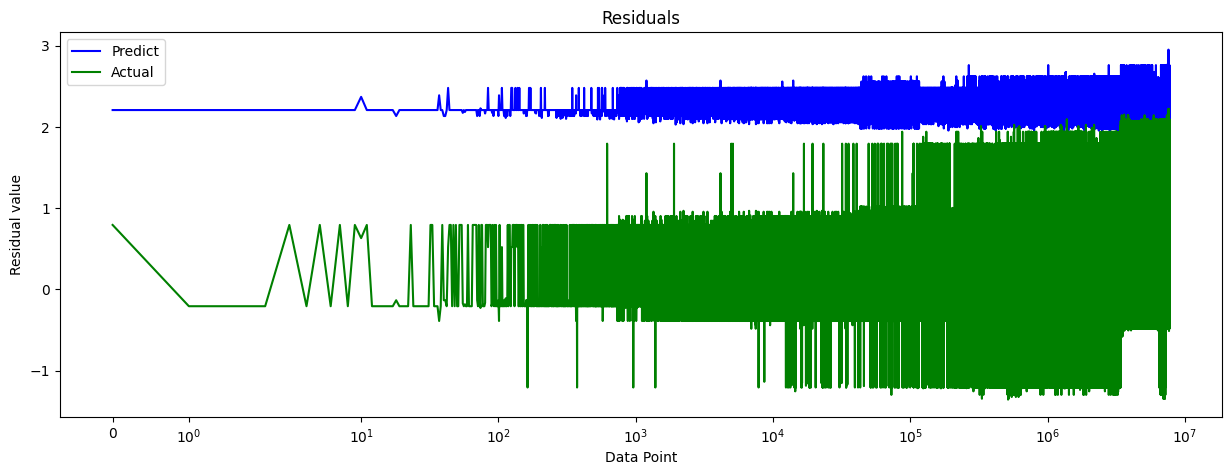

In [30]:
# Visualize the pattern 

# Predict output
y_predict = model_linear_results.predict(X_withconstant)

# Full model residuals 
full_model_residuals = y - y_predict

# Get the X axis tick marks or index of each data points
x_vals = list(range(y.shape[0])) # x-axis is index of each data point

# Set the figure size for the Residuals
plt.figure(figsize = (15,5))

# Plot the predict (blue line)
plt.plot(x_vals, y_predict,label="Predict", color='blue')

# Plot the fufull_model_residuals (orange line)
plt.plot(x_vals, full_model_residuals, label="Actual", color='green')

# Set the plot X axis scale
plt.xscale('symlog')

# Set the plot labels
plt.title("Residuals")
plt.xlabel("Data Point")
plt.ylabel("Residual value")
plt.legend()
plt.show()

The above residuals are hardly to interpret. 

As the **model reaches after $10^5$ seem doing well but after $10^6$** <u>there is slightly
to moderate overfitting.</u>

<a id='section_9'></a>

#### 9. Probability Plot (Q-Q) and Homoscedascity of Residuals

In [31]:
# We can also use our results object to get residuals
model_residuals = model_linear_results.resid 

# Fitted values are the predicted Y for each input row of independent variables.
# These values are also in the results object
model_fittedvals = model_linear_results.fittedvalues

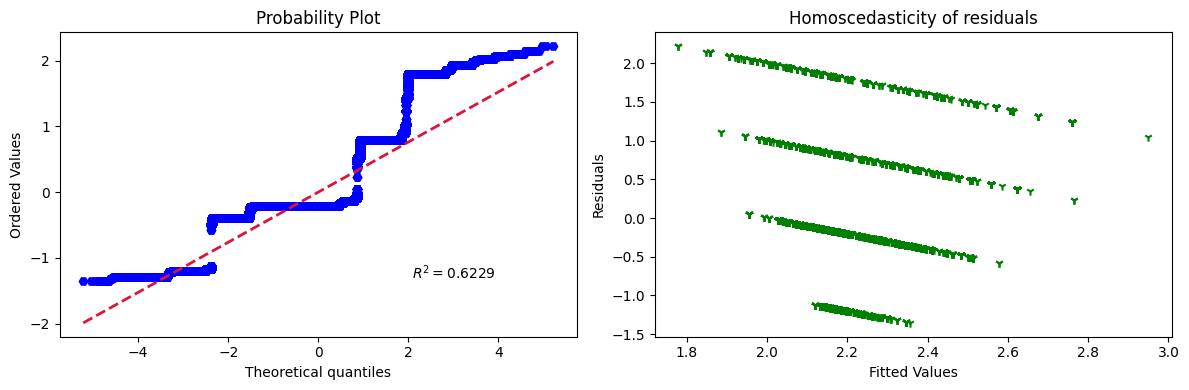

In [32]:
# Import the scipy library
import scipy.stats as stats

# Create the subplots 
fig, axs = plt.subplots(1, 2, figsize=(12, 4), tight_layout=True)

# Q-Q plot or the probplot
res = stats.probplot(model_residuals, dist="norm", plot = axs[0], rvalue=True, fit=True );

# Set the Q-Q plot marker attributes
axs[0].get_lines()[0].set_color('blue')
axs[0].get_lines()[0].set_marker('H')

# Set the argument of the Q-Q Plot line
axs[0].get_lines()[1].set_linewidth(2.0) #Prob line
axs[0].get_lines()[1].set_color('crimson') #Prob line
# ax[0].get_lines()[1].set_marker('4') #Prob line
axs[0].get_lines()[1].set_linestyle('dashed') #Prob line

# Plot for Homoscedacity
axs[1].scatter(model_fittedvals, model_residuals, color='green', marker='1')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity of residuals')

# plt.tight_layout()
plt.show()

**Deviations from the diagonal** <u>suggest that our data is not normally distributed.</u> Comparing quartiles of our data to quartiles of a theoretical normal distribution, <u>this plot is called a **normal Q-Q plot, or often just a Q-Q plot.**</u>

**The Q-Q plot shown above is not normally distributed or uniform. "S" or curving shaped,** <u>indicating that one of the distributions is more skewed than the other, or that one of the distributions has heavier tails than the other.</u> 

**Indicating it is not much of a good fit.** In the Univariate analysis the Severity 3 has a hump or own normal distribution.

On the right it show **somewhat of a homoscedacity** <u>at different residuals but in a group form.</u>

<a id='section_10'></a>

#### 10. Conclusion

**In summary, the covariance direction is hardly to determine as the independent variable are closely situated to zero.** 

Likewise <u>also difficult to interprete the correlation looking at the heatmap; which features are correlated.</u> 

So I decided to use the **Variance Inflation Factors (VIF) formula.** 

**In a perfect multicollinearity the value should be 1.**
Result values are below 2 however closely nearing to 1. That is moderately or slightly correlated (Multicollinear) between features.

**Build a regression model using the statsmodel.api Linear Regression $R^2$ value is 0.018** that could explain the variation in the target variable (Severity). <u>I have tried the Logistic regression and has failed.</u>

The **coefficient** <u>are near zero value.</u> The  **p-value is less than 0.05** that <u>suggest independent variables are significant in determine the Severity.</u>

**The probability plot (Q-Q plot)** <u>are not uniform.</u> Ordered values matches the Theoretical quantile at -3, -1, 1 and close to 2.
**With the Homoscedacity plot is also difficult to interpret and my research with such is subjective.** 
Comparing with other that such is not a violation of homoscedacity.

**In this first try of understanding the data it seem not making any sense.**

**The $R^2$ is abnormally low and the shape of the probability (Q-Q Plot) is unusual.**

**There are things possibly that I did wrong, things forgot to consider or overlooked.** 

**Or the statsmodel linear regression is not appropriate for this.**

[Back to top](#Top)